In [1]:
from __future__ import division, print_function
%load_ext autoreload
%autoreload 2
%matplotlib
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

nx = 512
ny = 512

generator = image_gen.get_image_gen(nx, ny, cnt=100)

Using matplotlib backend: Qt5Agg


/home/jericho/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_test, y_test = generator(30)

/home/jericho/ML_medphys/tf_unet/tf_unet/image_gen.py:100: RuntimeWarning: invalid value encountered in log
  np.random.normal(0, np.sqrt(np.exp(nr[:, j]) * 2500)) / 2500))
/home/jericho/ML_medphys/tf_unet/tf_unet/image_gen.py:125: RuntimeWarning: invalid value encountered in log
  0, np.sqrt(np.exp(nr2[:, i]) * 2500), size=image.shape)[m] / 2500))


In [6]:
import scipy.misc

for ii in range(30):
    
    scipy.misc.toimage(x_test[ii,...,0], cmin=0.0, cmax=1.0).save('/home/jericho/unet/data/chicken/test/{}.png'.format(ii))
#     scipy.misc.imsave('/home/jericho/unet/data/chicken/label/{}.png'.format(ii), y_test[ii,...,0])

/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


In [9]:
!ls

0.png	29.png			    HISTORY.rst
10.png	2.png			    LICENSE
11.png	3.png			    Makefile
12.png	4.png			    MANIFEST.in
13.png	5.png			    medphys_stuff
14.png	6.png			    MNIST_data
15.png	7.png			    net_python.m
16.png	8.png			    net_val.m
17.png	9.png			    prediction
18.png	Attenuation_with_water.pkl  README.rst
19.png	AUTHORS.rst		    requirements.txt
1.png	batch			    scripts
20.png	bgs_example_data	    setup.py
21.png	build			    test
22.png	CONTRIBUTING.rst	    testing_generator.ipynb
23.png	demo			    tf_unet
24.png	demo_radio_data.ipynb	    tf_unet.egg-info
25.png	demo_toy_problem.ipynb	    unet_trained
26.png	dist			    unet_trained2
27.png	docs			    Untitled.ipynb
28.png	graphs


In [3]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[20,...,0], aspect="auto")
ax[1].imshow(y_test[20,...,0], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=32)

Layers 3, features 32, filter size 3x3, pool size: 2x2


In [10]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [11]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=40, display_step=2)

Removing '/home/jericho/ML_medphys/tf_unet/prediction'
Removing '/home/jericho/ML_medphys/tf_unet/unet_trained'
Allocating '/home/jericho/ML_medphys/tf_unet/prediction'
Allocating '/home/jericho/ML_medphys/tf_unet/unet_trained'


/home/jericho/ML_medphys/tf_unet/tf_unet/image_gen.py:100: RuntimeWarning: invalid value encountered in log
  np.random.normal(0, np.sqrt(np.exp(nr[:, j]) * 2500)) / 2500))
/home/jericho/ML_medphys/tf_unet/tf_unet/image_gen.py:125: RuntimeWarning: invalid value encountered in log
  0, np.sqrt(np.exp(nr2[:, i]) * 2500), size=image.shape)[m] / 2500))


Verification error= 39.7%, loss= 1.0462
Start optimization
Iter 0, Minibatch Loss= 1.0529, Training Accuracy= 0.5414, Minibatch error= 45.9%
Iter 2, Minibatch Loss= 1.0269, Training Accuracy= 0.6459, Minibatch error= 35.4%
Iter 4, Minibatch Loss= 1.0294, Training Accuracy= 0.6217, Minibatch error= 37.8%
Iter 6, Minibatch Loss= 1.0452, Training Accuracy= 0.5586, Minibatch error= 44.1%
Iter 8, Minibatch Loss= 1.0476, Training Accuracy= 0.5438, Minibatch error= 45.6%
Iter 10, Minibatch Loss= 1.0315, Training Accuracy= 0.6052, Minibatch error= 39.5%
Iter 12, Minibatch Loss= 1.0519, Training Accuracy= 0.5224, Minibatch error= 47.8%
Iter 14, Minibatch Loss= 1.0520, Training Accuracy= 0.4779, Minibatch error= 52.2%
Iter 16, Minibatch Loss= 1.0252, Training Accuracy= 0.6249, Minibatch error= 37.5%
Iter 18, Minibatch Loss= 1.0444, Training Accuracy= 0.5303, Minibatch error= 47.0%
Epoch 0, Average loss: 1.0458, learning rate: 0.2000
Verification error= 39.7%, loss= 1.0317
Iter 20, Minibatch Loss

Iter 178, Minibatch Loss= 0.9398, Training Accuracy= 0.6581, Minibatch error= 34.2%
Epoch 8, Average loss: 0.9874, learning rate: 0.1327
Verification error= 27.2%, loss= 0.9264
Iter 180, Minibatch Loss= 0.9422, Training Accuracy= 0.6970, Minibatch error= 30.3%
Iter 182, Minibatch Loss= 0.9112, Training Accuracy= 0.7382, Minibatch error= 26.2%
Iter 184, Minibatch Loss= 0.8616, Training Accuracy= 0.7979, Minibatch error= 20.2%
Iter 186, Minibatch Loss= 0.8686, Training Accuracy= 0.7885, Minibatch error= 21.2%
Iter 188, Minibatch Loss= 0.8399, Training Accuracy= 0.8008, Minibatch error= 19.9%
Iter 190, Minibatch Loss= 0.7023, Training Accuracy= 0.9198, Minibatch error= 8.0%
Iter 192, Minibatch Loss= 0.7048, Training Accuracy= 0.9088, Minibatch error= 9.1%
Iter 194, Minibatch Loss= 0.7861, Training Accuracy= 0.7887, Minibatch error= 21.1%
Iter 196, Minibatch Loss= 1.5680, Training Accuracy= 0.6497, Minibatch error= 35.0%
Iter 198, Minibatch Loss= 0.8786, Training Accuracy= 0.8358, Minibatc

Iter 354, Minibatch Loss= 0.7246, Training Accuracy= 0.8411, Minibatch error= 15.9%
Iter 356, Minibatch Loss= 0.6760, Training Accuracy= 0.8697, Minibatch error= 13.0%
Iter 358, Minibatch Loss= 0.6849, Training Accuracy= 0.9217, Minibatch error= 7.8%
Epoch 17, Average loss: 0.7879, learning rate: 0.0836
Verification error= 25.2%, loss= 0.8282
Iter 360, Minibatch Loss= 0.9703, Training Accuracy= 0.6932, Minibatch error= 30.7%
Iter 362, Minibatch Loss= 0.7676, Training Accuracy= 0.7888, Minibatch error= 21.1%
Iter 364, Minibatch Loss= 0.7076, Training Accuracy= 0.8469, Minibatch error= 15.3%
Iter 366, Minibatch Loss= 0.6689, Training Accuracy= 0.8692, Minibatch error= 13.1%
Iter 368, Minibatch Loss= 0.6725, Training Accuracy= 0.8727, Minibatch error= 12.7%
Iter 370, Minibatch Loss= 0.6562, Training Accuracy= 0.8779, Minibatch error= 12.2%
Iter 372, Minibatch Loss= 0.7847, Training Accuracy= 0.7797, Minibatch error= 22.0%
Iter 374, Minibatch Loss= 0.6640, Training Accuracy= 0.8799, Miniba

Iter 530, Minibatch Loss= 0.6953, Training Accuracy= 0.8518, Minibatch error= 14.8%
Iter 532, Minibatch Loss= 0.7043, Training Accuracy= 0.8401, Minibatch error= 16.0%
Iter 534, Minibatch Loss= 0.6245, Training Accuracy= 0.8907, Minibatch error= 10.9%
Iter 536, Minibatch Loss= 0.6621, Training Accuracy= 0.8490, Minibatch error= 15.1%
Iter 538, Minibatch Loss= 0.5797, Training Accuracy= 0.9067, Minibatch error= 9.3%
Epoch 26, Average loss: 0.7183, learning rate: 0.0527
Verification error= 13.6%, loss= 0.6583
Iter 540, Minibatch Loss= 0.7114, Training Accuracy= 0.8311, Minibatch error= 16.9%
Iter 542, Minibatch Loss= 0.6839, Training Accuracy= 0.8578, Minibatch error= 14.2%
Iter 544, Minibatch Loss= 0.5816, Training Accuracy= 0.9265, Minibatch error= 7.3%
Iter 546, Minibatch Loss= 0.7731, Training Accuracy= 0.8043, Minibatch error= 19.6%
Iter 548, Minibatch Loss= 0.7175, Training Accuracy= 0.8115, Minibatch error= 18.9%
Iter 550, Minibatch Loss= 0.6510, Training Accuracy= 0.8654, Minibat

Iter 706, Minibatch Loss= 0.7020, Training Accuracy= 0.8164, Minibatch error= 18.4%
Iter 708, Minibatch Loss= 0.6445, Training Accuracy= 0.8521, Minibatch error= 14.8%
Iter 710, Minibatch Loss= 0.7111, Training Accuracy= 0.7969, Minibatch error= 20.3%
Iter 712, Minibatch Loss= 0.6742, Training Accuracy= 0.8348, Minibatch error= 16.5%
Iter 714, Minibatch Loss= 0.5999, Training Accuracy= 0.8935, Minibatch error= 10.6%
Iter 716, Minibatch Loss= 0.5998, Training Accuracy= 0.9033, Minibatch error= 9.7%
Iter 718, Minibatch Loss= 0.7325, Training Accuracy= 0.8112, Minibatch error= 18.9%
Epoch 35, Average loss: 0.7042, learning rate: 0.0332
Verification error= 15.2%, loss= 0.6658
Iter 720, Minibatch Loss= 0.5950, Training Accuracy= 0.8889, Minibatch error= 11.1%
Iter 722, Minibatch Loss= 0.8075, Training Accuracy= 0.7793, Minibatch error= 22.1%
Iter 724, Minibatch Loss= 0.6111, Training Accuracy= 0.8908, Minibatch error= 10.9%
Iter 726, Minibatch Loss= 0.6155, Training Accuracy= 0.8803, Miniba

In [9]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=64)

Layers 3, features 64, filter size 3x3, pool size: 2x2
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [ ]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=40, display_step=2)

In [13]:
prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt
Model restored from file: ./unet_trained/model.cpkt


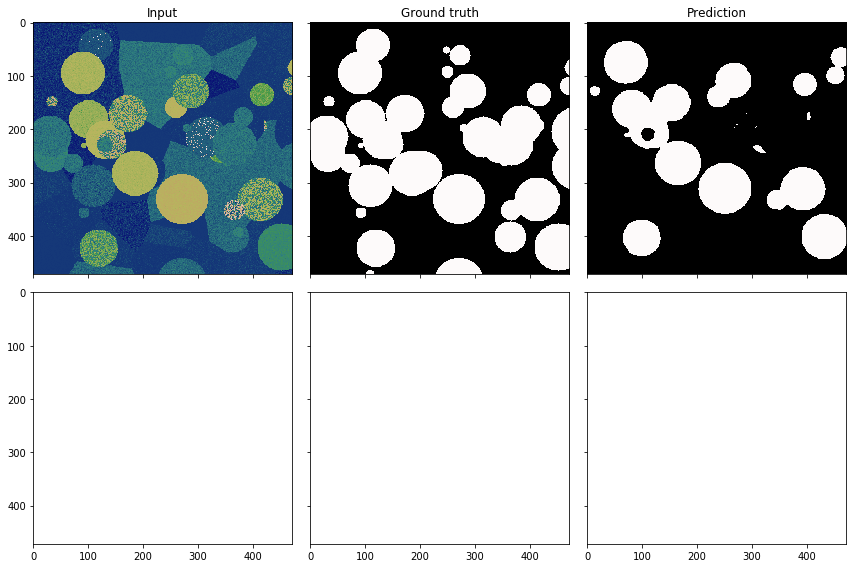

In [70]:
%matplotlib inline
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,8))
for i in range(ax.shape[0]-1):
    ax[i, 0].imshow(x_test[i,...,0], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,1], aspect="auto")
    mask = prediction[i,...,1] > 0.9
    ax[i, 2].imshow(mask, aspect="auto")
ax[0, 0].set_title("Input")
ax[0, 1].set_title("Ground truth")
ax[0, 2].set_title("Prediction")
fig.tight_layout()
fig.savefig("docs/toy_problem.png")

In [9]:
from keras.utils import plot_model
plot_model(net, to_file='model.png')

AttributeError: 'Unet' object has no attribute 'layers'

In [8]:
net.layers

AttributeError: 'Unet' object has no attribute 'layers'

In [10]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Download, extract and load MNIST dataset
data = input_data.read_data_sets('MNIST_data', one_hot=True)

# Define Placeholders for data and labels
with tf.name_scope('Input'):
    x = tf.placeholder(tf.float32,[None,784],name="x")
    y_true = tf.placeholder(tf.float32,[None,10],name="labels")

# Define model variables
with tf.name_scope('Weights'):
    weights = tf.Variable(tf.random_uniform([784,10],-1,1),name="weights")
with tf.name_scope('Biases'):
    biases = tf.Variable(tf.zeros([10]),name="biases")

# Define the model
with tf.name_scope('LinearModel'):
    logits = tf.matmul(x,weights) + biases
    y_pred = tf.nn.softmax(logits)

# Define cost measure
with tf.name_scope('CrossEntropy'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)
    loss = tf.reduce_mean(cross_entropy)

# create optimizer
with tf.name_scope('GDOptimizer'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(loss)

with tf.name_scope('Accuracy'):
    y_pred_cls = tf.argmax(y_pred,dimension=1)
    y_true_cls = tf.argmax(y_true,dimension=1)
    correct_pred = tf.equal(y_pred_cls,y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# adding summary
tf.summary.scalar("loss", loss)
tf.summary.scalar("accuracy", accuracy)
tf.summary.histogram("weights", weights)
tf.summary.histogram("biases", biases)
summary_op = tf.summary.merge_all()


with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', graph=tf.get_default_graph())
    num_iter = 1000
    sess.run(tf.global_variables_initializer())

    for i in range(num_iter):
        x_batch,y_batch = data.train.next_batch(100)
        feed_dict = {x: x_batch,y_true: y_batch}
        _,summary = sess.run([train_step,summary_op],feed_dict)
        writer.add_summary(summary,i)
        if i % 50 == 0:
            loss_val = sess.run(loss,feed_dict)
            print("Loss: ",loss_val)
    
    x_test,y_test = data.test.next_batch(10000)    
    print("Accuracy of model: ",accuracy.eval(feed_dict = {x:x_test,y_true:y_test}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/home/jericho/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jericho/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/jericho/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/jericho/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/jericho/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 759, in _run_callback
    ret = callback()
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 263, in enter_eventloop
    self.eventloop(self)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 134, in loop_qt5
    return loop_qt4(kernel)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 122, in loop_qt4
    _loop_qt(kernel.app)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 106, in _loop_qt
    app.exec_()
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 39, in process_stream_events
    kernel.do_one_iteration()
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 298, in do_one_iteration
    stream.flush(zmq.POLLIN, 1)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 357, in flush
    self._handle_recv()
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-41bb611c4191>", line 1, in <module>
    net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)
  File "/home/jericho/ML_medphys/tf_unet/tf_unet/unet.py", line 188, in __init__
    self.keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4848, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/jericho/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
